In [4]:
# https://seaborn.pydata.org/tutorial.html

In [10]:
import numpy as np
import pandas as pd
#import maplotlib as mp #.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')

In [ ]:
# Visualizing statistical relationships

In [ ]:
# Relating variables with scatter plots

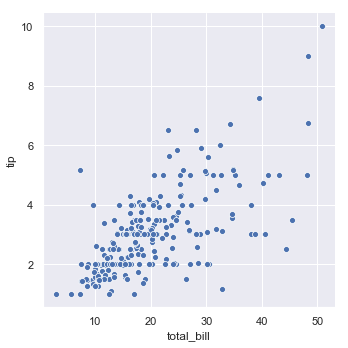

In [5]:
# scatterplot
tips = sns.load_dataset("tips")
sns.relplot(x="total_bill", y="tip", data=tips)

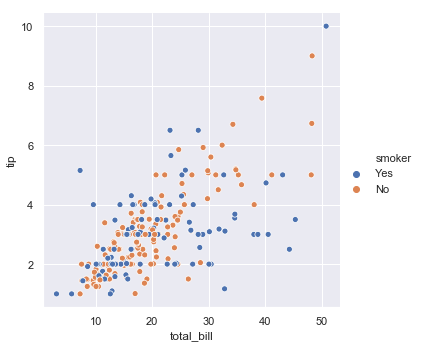

In [6]:
# color based on smoker
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips)


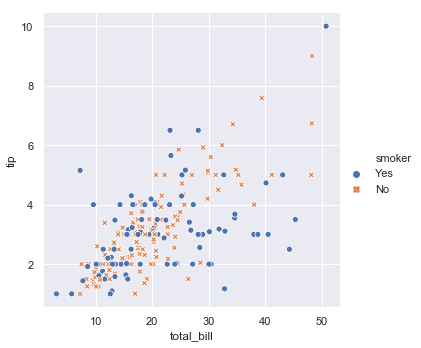

In [7]:
# change the mark type based on smoker
sns.relplot(x="total_bill", y="tip", hue="smoker", style="smoker", data=tips)


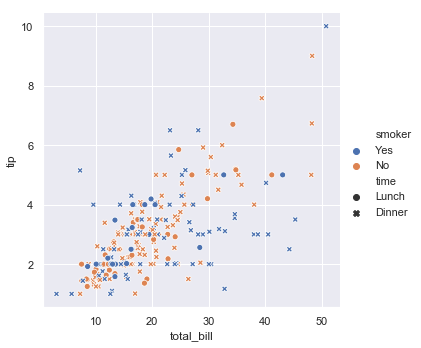

In [8]:
# vary the mark type and color based on different fields
sns.relplot(x="total_bill", y="tip", hue="smoker", style="time", data=tips)


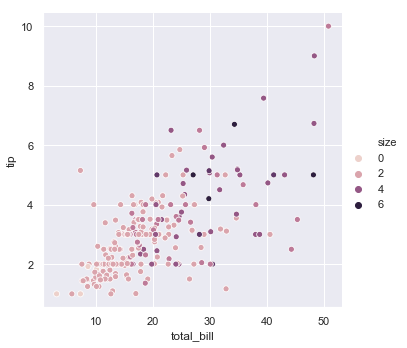

In [9]:
# if the hue variable is categorical, a categorical color scale will be used
# if the hue variable is continuous, a continuous color scale will be used
sns.relplot(x="total_bill", y="tip", hue="size", data=tips)


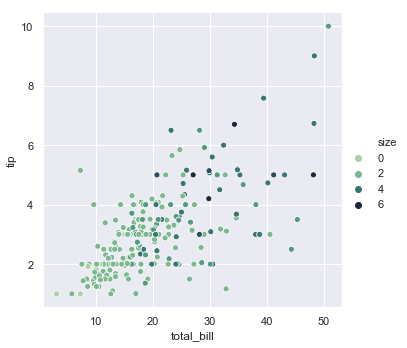

In [10]:
# use a different sequential palette
# ch = cubehelix
# r = rotation
# l = lightness
sns.relplot(x="total_bill", y="tip", hue="size", palette="ch:r=-.5,l=.75", 
            data=tips)

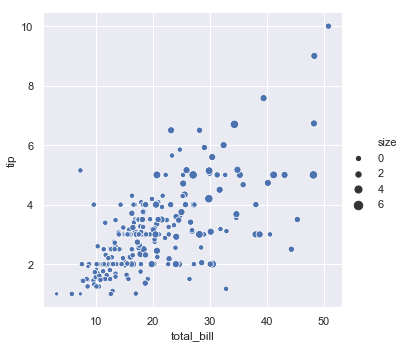

In [11]:
# vary the size of the marks
sns.relplot(x="total_bill", y="tip", size="size", data=tips)

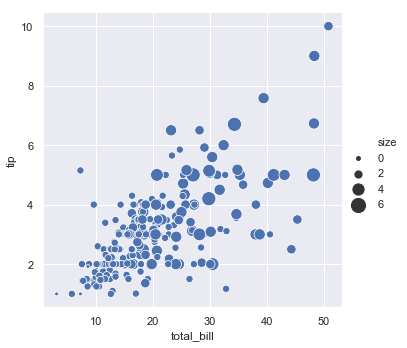

In [12]:
# point sizes are normalized into a range
# customized range
sns.relplot(x="total_bill", y="tip", size="size", sizes=(15,200), data=tips)   

In [2]:
# Emphasizing continuity with line plots

In [15]:
df = pd.DataFrame(dict(time=np.arange(500), value=np.random.randn(500).cumsum()))
df.head()

,time,value
0,0,-0.030982
1,1,-0.679873
2,2,-1.166672
3,3,-0.501264
4,4,-0.840007


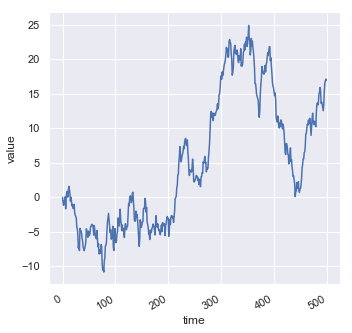

In [16]:
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate()

In [17]:
# disable sorting by x values by adding the kwarg sort=False

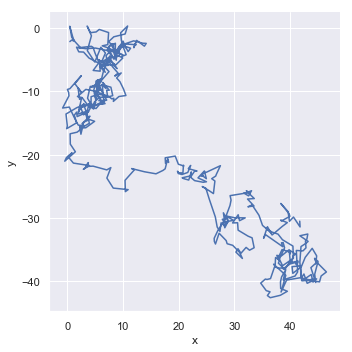

In [18]:
df = pd.DataFrame(np.random.randn(500,2).cumsum(axis=0), columns=["x","y"])
sns.relplot(x="x", y="y", kind="line", sort=False, data=df)

In [19]:
# Aggregation andrepresenting uncertainty

In [21]:
fmri = sns.load_dataset("fmri")

C:\Users\Kelly\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


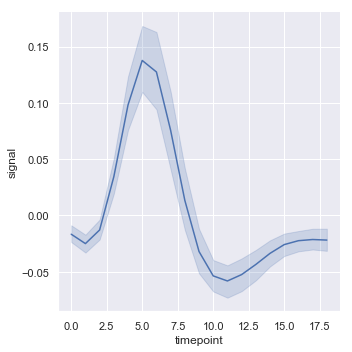

In [25]:
# default aggregation is mean with 95% conf interval (computed using bootstrapping)
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri)

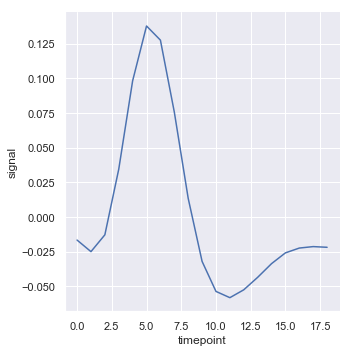

In [26]:
# without confidence interval (ci kwarg)
sns.relplot(x="timepoint", y="signal", ci=None, kind="line", data=fmri)

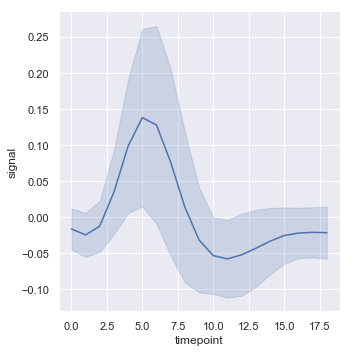

In [28]:
# plot the standard deviation (instead of ci)
sns.relplot(x="timepoint", y="signal", kind="line", ci="sd", data=fmri)

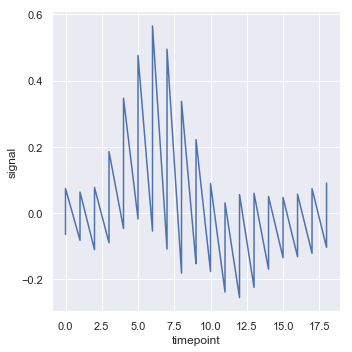

In [29]:
# turn off estimation altogether (estimator=None)
sns.relplot(x="timepoint", y="signal", kind="line", estimator=None, data=fmri)

In [30]:
# Plotting subsets of data with semantic mapping

C:\Users\Kelly\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


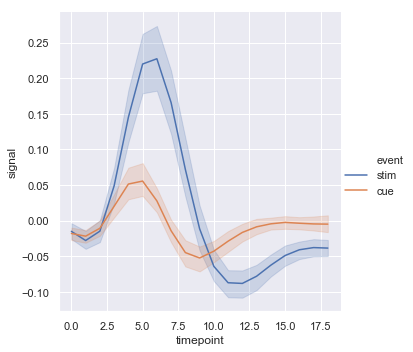

In [31]:
# split by color
sns.relplot(x="timepoint", y="signal", kind="line", hue="event", data=fmri)

C:\Users\Kelly\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


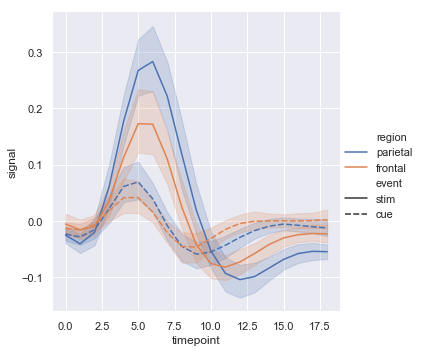

In [33]:
# add astyle semantic to change the pattern to dashes
sns.relplot(x="timepoint", y="signal", kind="line",
           hue="region", style="event", data=fmri)

C:\Users\Kelly\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


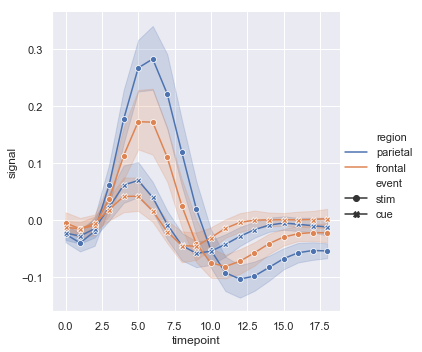

In [37]:
# vary the markers
# style semantic controls the line style and marker
# marker semantic conrols marker on/off
# dashes semantic controls dashed line on/off
sns.relplot(x="timepoint", y="signal", hue="region", kind="line",
           style="event", dashes=False, markers=True, data=fmri)

C:\Users\Kelly\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


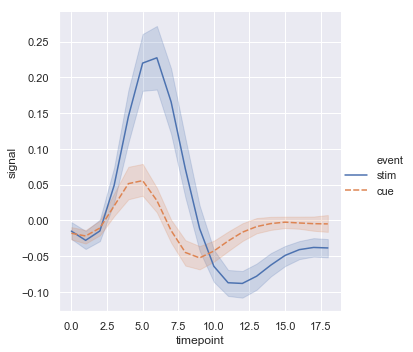

In [38]:
# using both color and line style to differentiate one field (event)
sns.relplot(x="timepoint", y="signal", kind="line",
           style="event", hue="event", data=fmri)

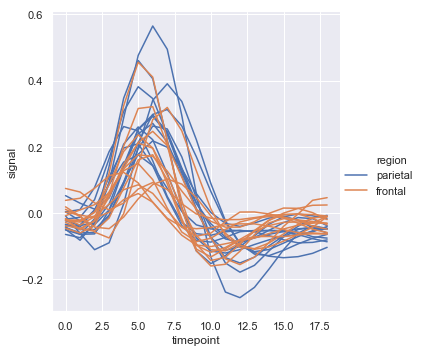

In [42]:
# plot each sampling unit (subject) separately
sns.relplot(x="timepoint", y="signal", kind="line",
            hue="region", units="subject", estimator=None, 
            data=fmri.query("event=='stim'"))